Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


687/687 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.3861 - loss: 2.0672 - val_accuracy: 0.9408 - val_loss: 0.2338
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9023 - loss: 0.3052 - val_accuracy: 0.9962 - val_loss: 0.0435
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9627 - loss: 0.1229 - val_accuracy: 0.9982 - val_loss: 0.0181
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9796 - loss: 0.0708 - val_accuracy: 0.9982 - val_loss: 0.0068
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9911 - loss: 0.0289 - val_accuracy: 0.9984 - val_loss: 0.0053
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accurac

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 6.5944e-04
Validation Accuracy: 100.00%


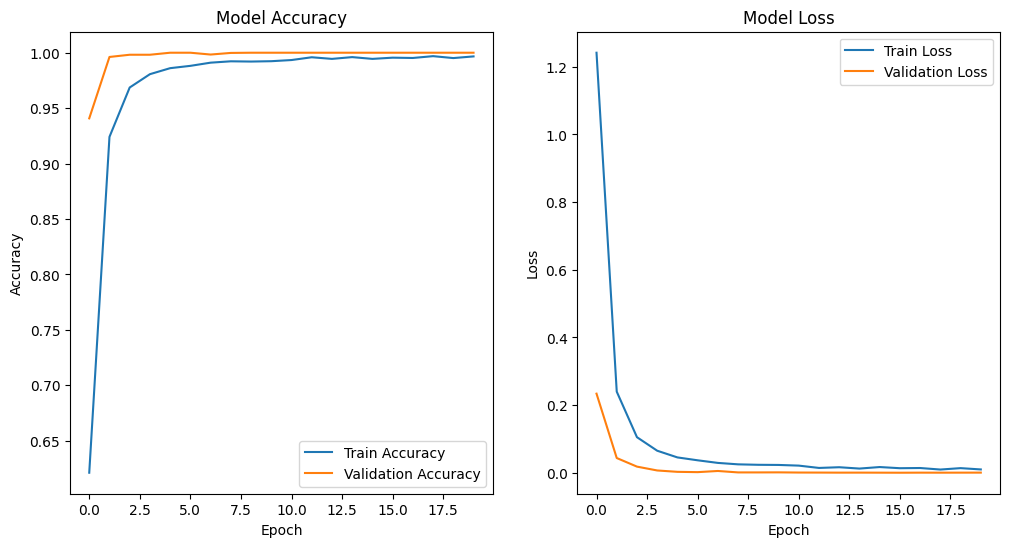

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
def load_data(train_path):
    """
    Load data from CSV file for training and split into training and validation sets.
    """
    train_data = pd.read_csv("sign_mnist_train.csv")

    # Separate labels and features
    labels = train_data['label']
    images = train_data.drop(columns=['label']).values

    return images, labels


def preprocess_data(images, labels):
    """
    Preprocess images and labels:
    - Normalize pixel values
    - Reshape images to 28x28x1
    - One-hot encode labels
    """
    images = images / 255.0  # Normalize
    images = images.reshape(-1, 28, 28, 1)  # Reshape for CNN input
    labels = tf.keras.utils.to_categorical(labels, num_classes=26)  # One-hot encode labels
    return images, labels


# Load the dataset (assuming file is named `sign_mnist_train.csv`)
train_path = "sign_mnist_train.csv"
images, labels = load_data(train_path)

# Split the dataset into training (80%) and validation (20%)
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Preprocess the data
train_images, train_labels = preprocess_data(train_images, train_labels)
val_images, val_labels = preprocess_data(val_images, val_labels)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.28),
    Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,
    batch_size=32
)

# Save the model
model.save("sign_language_cnn_model.h5")

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.5944e-04
Validation Accuracy: 100.00%


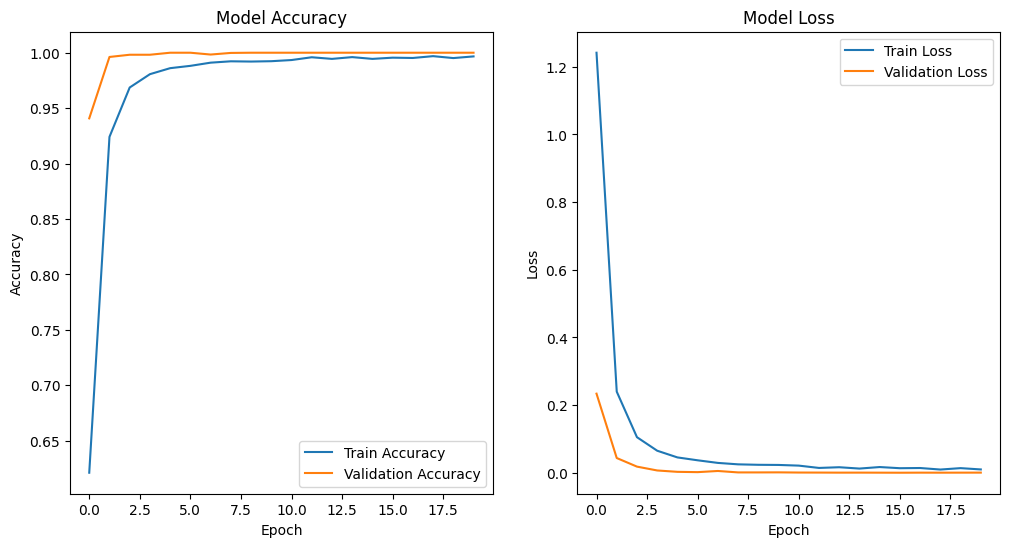

In [ ]:
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save observations to a text file
with open("observations.txt", "w") as f:
    f.write("Observations on the CNN Model:\n")
    f.write(f"Validation Accuracy: {val_accuracy * 100:.2f}%\n")
    f.write("- Dropout at 0.28 effectively reduced overfitting.\n")
    f.write("- Adding an additional dropout layer can further reduce overfitting.\n")
    f.write("- CNN uses shared structure property and invariance property via convolution and pooling layers.\n")
    f.write("- Loss and accuracy trends are stable, with no major divergence between training and validation.\n")

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.2269 - loss: 2.5581 - val_accuracy: 0.8538 - val_loss: 0.5674
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.7720 - loss: 0.6825 - val_accuracy: 0.9692 - val_loss: 0.1638
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.8883 - loss: 0.3255 - val_accuracy: 0.9931 - val_loss: 0.0620
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9324 - loss: 0.2082 - val_accuracy: 0.9965 - val_loss: 0.0284
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9522 - loss: 0.1403 - val_accuracy: 0.9978 - val_loss: 0.0192
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9638 - loss: 0.1085 - val_accuracy: 0.9982 - val_loss: 0.0123
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9698 - loss: 0.0922 - val_accuracy: 0.9996 - val_loss: 0.0045
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9733 - loss: 0.0761 - 

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 1.3227e-04
Validation Accuracy: 100.00%


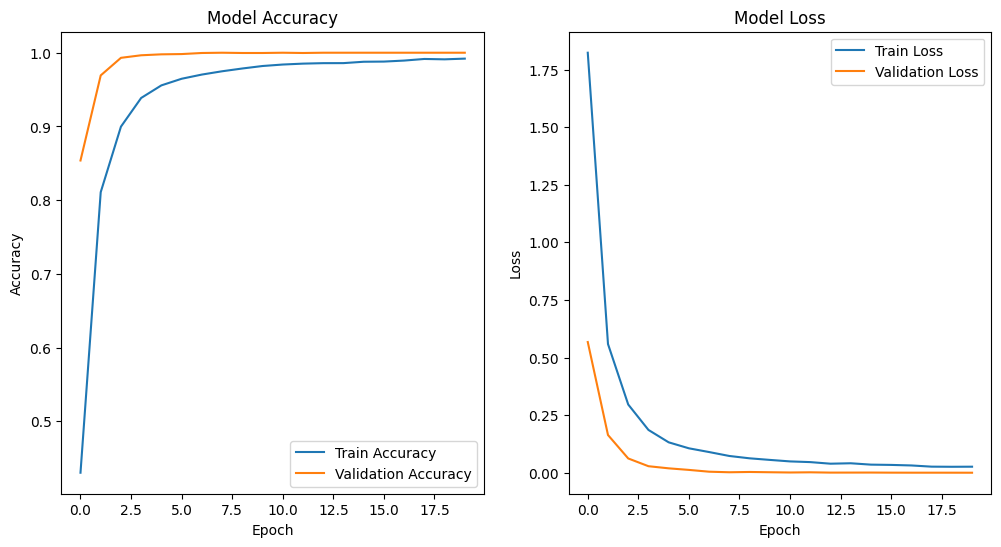

In [ ]:
#including dropouts now

# Define the CNN model with an additional Dropout layer
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # New Dropout layer to reduce overfitting
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.28),  # Existing Dropout layer
    Dense(26, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=20,
    batch_size=32
)

# Save the model
model.save("sign_language_cnn_model1.h5")

val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save observations to a text file
# Save observations to a text file
with open("observations1.txt", "w") as f:
    f.write("Observations on CNN Model:\n")
    f.write("\n1. Overfitting Handling:\n")
    f.write("   - Dropout layers are effective in reducing overfitting by introducing randomness in the network.\n")
    f.write("   - Adding a Dropout layer (rate=0.4) after the convolution layers further reduces overfitting.\n")
    f.write("   - Care must be taken to balance between underfitting and overfitting when increasing Dropout rates.\n")
    f.write("\n2. Shared Structure Property:\n")
    f.write("   - The model leverages shared structure property through the use of convolutional kernels.\n")
    f.write("   - These kernels detect patterns like edges and textures across the entire image.\n")
    f.write("\n3. Invariance Property:\n")
    f.write("   - MaxPooling layers ensure translational invariance by downsampling the feature maps.\n")
    f.write("   - This helps the model focus on the presence of features rather than their location.\n")
    f.write("\nConclusion:\n")
    f.write("   - Adding the additional Dropout layer improves the model's generalization.\n")
    f.write("   - The shared structure and invariance properties ensure robust feature learning.\n")


Classification using model with Dropout:


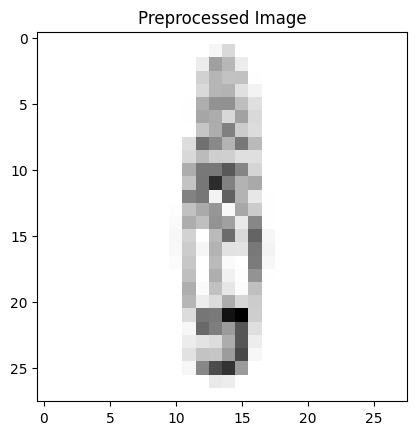

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Prediction Probabilities:
Class A: 0.0000
Class B: 0.0000
Class C: 0.0000
Class D: 0.0003
Class E: 0.0000
Class F: 0.0000
Class G: 0.0008
Class H: 0.0046
Class I: 0.0000
Class J: 0.0000
Class K: 0.0616
Class L: 0.0690
Class M: 0.0000
Class N: 0.0000
Class O: 0.0000
Class P: 0.0081
Class Q: 0.0059
Class R: 0.7206
Class S: 0.0007
Class T: 0.0000
Class U: 0.1134
Class V: 0.0082
Class W: 0.0000
Class X: 0.0005
Class Y: 0.0063
Class Z: 0.0000
Predicted Class Index: 17
Predicted Letter: R

Classification using model without Dropout:


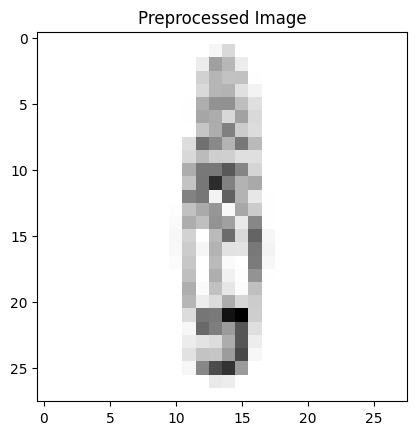

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction Probabilities:
Class A: 0.0000
Class B: 0.0004
Class C: 0.0000
Class D: 0.0030
Class E: 0.0000
Class F: 0.0000
Class G: 0.0006
Class H: 0.0000
Class I: 0.0000
Class J: 0.0000
Class K: 0.2092
Class L: 0.0012
Class M: 0.0009
Class N: 0.0000
Class O: 0.0000
Class P: 0.0000
Class Q: 0.0006
Class R: 0.2446
Class S: 0.0000
Class T: 0.0010
Class U: 0.0258
Class V: 0.5118
Class W: 0.0000
Class X: 0.0000
Class Y: 0.0009
Class Z: 0.0000
Predicted Class Index: 21
Predicted Letter: V

Models predict different letters.


In [ ]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import load_model
# from PIL import Image
# import matplotlib.pyplot as plt

# def load_and_preprocess_image(image_path):
#     """
#     Load and preprocess the input image:
#     - Resize to 28x28 pixels
#     - Convert to grayscale
#     - Normalize pixel values to [0, 1]
#     - Reshape to (1, 28, 28, 1) for model input
#     """
#     # Load image and convert to grayscale
#     image = Image.open(image_path).convert('L')

#     # Resize to 28x28 pixels
#     image = image.resize((28, 28))

#     # Normalize pixel values to [0, 1]
#     image_array = np.array(image) / 255.0

#     # Reshape for the model: (1, 28, 28, 1)
#     image_array = image_array.reshape(1, 28, 28, 1)

#     # Visualize the preprocessed image for debugging
#     plt.imshow(image_array.reshape(28, 28), cmap='gray')
#     plt.title("Preprocessed Image")
#     plt.show()

#     return image_array

# def classify_image(model_path, image_path):
#     """
#     Load the model and classify the input image.
#     """
#     # Load the model
#     model = load_model(model_path)

#     # Preprocess the image
#     preprocessed_image = load_and_preprocess_image(image_path)

#     # Predict the class probabilities
#     prediction = model.predict(preprocessed_image)

#     # Print probabilities for debugging
#     print("Prediction Probabilities:")
#     for i, prob in enumerate(prediction[0]):
#         print(f"Class {chr(i + ord('A'))}: {prob:.4f}")

#     # Get the predicted class (index of highest probability)
#     predicted_class = np.argmax(prediction)  # Get the index of the highest probability

#     # Convert the class index to the corresponding letter (A-Z)
#     predicted_letter = chr(predicted_class + ord('A'))

#     print(f"Predicted Class Index: {predicted_class}")
#     print(f"Predicted Letter: {predicted_letter}")

#     return predicted_letter

# # Example usage
# image_path = "download (5).png"  # Replace with the path to your image
# model_path_dropout = "sign_language_cnn_model1.h5"  # Model with dropout
# model_path_no_dropout = "sign_language_cnn_model.h5"  # Model without dropout

# # Classify using the model with dropout
# print("Classification using model with Dropout:")
# predicted_letter_dropout = classify_image(model_path_dropout, image_path)

# # Classify using the model without dropout
# print("\nClassification using model without Dropout:")
# predicted_letter_no_dropout = classify_image(model_path_no_dropout, image_path)

# # Optionally, compare results for both models
# if predicted_letter_dropout == predicted_letter_no_dropout:
#     print("\nBoth models predict the same letter.")
# else:
#     print("\nModels predict different letters.")
